In [128]:
import requests
import pandas as pd
import numpy as np
import re
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic'


In [166]:
data=pd.read_pickle('data/전체기간_지자체별_사고통계.pkl')
data

,기준년도,시도명,사고분류명,사고건수,사고건수구성비,사망자수,사망자수구성비,치사율,부상자수,부상자수구성비,총사고건수,총사망자수,총부상자수,인구10만명당사고건수,자동차1만대당사고건수
0,2010,강원도,전체사고,9026,3.98,267,4.85,2.96,15693,4.45,226878,5505,352458,607.19,119.17
1,2010,강원도,어린이사고,723,5.13,3,2.38,0.41,938,5.46,14095,126,17178,0,0
2,2010,강원도,고령자사고,1182,4.58,73,4.17,6.18,1361,4.97,25810,1752,27394,0,0
3,2010,강원도,보행자사고,1665,3.3,87,4.18,5.23,1674,3.29,50431,2082,50899,0,0
4,2010,강원도,자전거사고,50,1.88,1,1.37,2,52,1.9,2663,73,2731,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2947,2019,충청북도 충주시,고령운전자사고,254,0.76,4,0.52,1.57,452,0.94,33239,769,48223,0,0
2948,2019,충청북도 충주시,고령보행자사고,66,0.54,5,0.67,7.58,61,0.52,12249,743,11653,0,0
2949,2019,충청북도 충주시,개인이동수단(PM)사고,1,0.22,1,12.5,100,0,0,447,8,473,0,0
2950,2019,충청북도 충주시,뺑소니사고,40,0.56,1,1.11,2.5,53,0.52,7129,90,10285,0,0


In [167]:
data=data[(data['시도명'].apply(lambda x: False if re.match('\w+ \w+',x) else True))|(data['시도명']=='경기도 오산시')]
data=data[(data['사고분류명']=='전체사고')|(data['사고분류명']=='어린이사고')]
data=data[data['기준년도']=='2019']
data

,기준년도,시도명,사고분류명,사고건수,사고건수구성비,사망자수,사망자수구성비,치사율,부상자수,부상자수구성비,총사고건수,총사망자수,총부상자수,인구10만명당사고건수,자동차1만대당사고건수
0,2019,강원도,전체사고,7554,3.29,185,5.52,2.45,11752,3.44,229600,3349,341712,498.08,80.18
1,2019,강원도,어린이사고,367,3.32,3,10.71,0.82,477,3.38,11054,28,14115,0,0
213,2019,경기도,전체사고,55463,24.16,631,18.84,1.14,84508,24.73,229600,3349,341712,418.97,87.15
214,2019,경기도,어린이사고,2920,26.42,1,3.57,0.03,3802,26.94,11054,28,14115,0,0
489,2019,경기도 오산시,전체사고,1057,0.46,7,0.21,0.66,1582,0.46,229600,3349,341712,452,94.59
490,2019,경기도 오산시,어린이사고,64,0.58,0,0,0,79,0.56,11054,28,14115,0,0
615,2019,경상남도,전체사고,12830,5.59,293,8.75,2.28,18563,5.43,229600,3349,341712,383.02,61.93
616,2019,경상남도,어린이사고,608,5.5,2,7.14,0.33,784,5.55,11054,28,14115,0,0
841,2019,경상북도,전체사고,14648,6.38,354,10.57,2.42,21970,6.43,229600,3349,341712,549.72,76.8
842,2019,경상북도,어린이사고,689,6.23,1,3.57,0.15,867,6.14,11054,28,14115,0,0


In [168]:
시도_list=data['시도명'].unique().tolist()
시도_list

['강원도',
 '경기도',
 '경기도 오산시',
 '경상남도',
 '경상북도',
 '광주광역시',
 '대구광역시',
 '대전광역시',
 '부산광역시',
 '서울특별시',
 '세종특별자치시',
 '울산광역시',
 '인천광역시',
 '전라남도',
 '전라북도',
 '제주도',
 '충청남도',
 '충청북도']

In [73]:
total_list=[(x,data[(data['시도명']==x)&(data['사고분류명']=='전체사고')]['사고건수'].values[0]) for x in 시도_list]
child_list=[(x,data[(data['시도명']==x)&(data['사고분류명']=='어린이사고')]['사고건수'].values[0]) for x in 시도_list]

In [121]:
td_list=[(x,data[(data['시도명']==x)&(data['사고분류명']=='전체사고')]['사망자수'].values[0]) for x in 시도_list]
cd_list=[(x,data[(data['시도명']==x)&(data['사고분류명']=='어린이사고')]['사망자수'].values[0]) for x in 시도_list]

In [146]:
table=pd.DataFrame({'시도명':시도_list,
                    '전체사고':[t[1] for t in total_list],
                    '전체사고사망':[t[1] for t in td_list],
                    '어린이사고':[c[1] for c in child_list],
                   '어린이사고사망':[t[1] for t in cd_list]
})
table['어린이사고비중']=round(table['어린이사고']/table['전체사고'],3)
table.name='2019년 사고'
table.index=table['시도명']
table=table.sort_values('어린이사고비중',ascending=False)
table.to_pickle('2019년_지자체별_어린이사고비중')

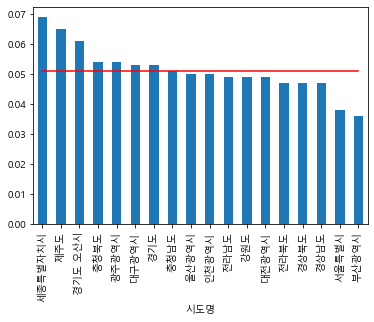

In [162]:
fig=plt.figure()
plt.figsize=(1200,800)
table['어린이사고비중'].plot(kind='bar')
plt.plot(table.index,[table['어린이사고비중'].mean() for x in range(len(table.index))],'r')
plt.show()

In [163]:
data_=pd.read_pickle('data/지역별교통사고요약.pkl')
data_

,지역,전체사고,어린이사고,어린이사고비중,총인구수,인구1000명당사고,1000명당어린이사고
0,강원도 강릉시,888,57,6.418919,213442,4.160381,0.267051
1,강원도 고성군,138,9,6.521739,27260,5.062362,0.330154
2,강원도 동해시,358,11,3.072626,90522,3.954840,0.121517
3,강원도 삼척시,414,21,5.072464,67228,6.158148,0.312370
4,강원도 속초시,391,29,7.416880,81786,4.780769,0.354584
...,...,...,...,...,...,...,...
223,충청북도 제천시,870,51,5.862069,134617,6.462780,0.378853
224,충청북도 증평군,210,8,3.809524,37392,5.616175,0.213950
225,충청북도 진천군,516,24,4.651163,81084,6.363771,0.295989
226,충청북도 청주시,4949,273,5.516266,839566,5.894712,0.325168


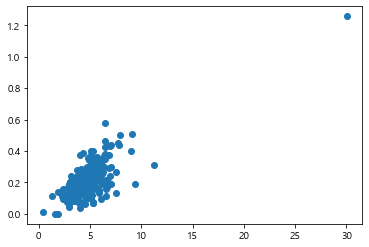

In [165]:
plt.plot(data_['인구1000명당사고'],data_['1000명당어린이사고'],'o')

In [260]:
data=pd.read_pickle('data/2019popul.pkl')


In [261]:
data=data[data['행정기관'].apply(lambda x:True if re.match('\w+ \w+',x) else False)]
data=data[data['행정기관'].apply(lambda x:False if re.match('\w+ \w+ \w+',x) else True)]
data=data.iloc[:,:3]
data.index=data['행정기관']
data=data.iloc[:,1:]
data

,총인구수,세대수
행정기관,,
서울특별시 종로구,"151,290","73,947"
서울특별시 중구,"126,171","62,739"
서울특별시 용산구,"228,670","110,126"
서울특별시 성동구,"300,889","135,838"
서울특별시 광진구,"351,350","164,428"
...,...,...
경상남도 함양군,"39,637","20,427"
경상남도 거창군,"62,179","29,538"
경상남도 합천군,"45,204","24,173"


In [250]:
dd=pd.read_pickle('지자체별_사고통계.pkl')
dd=dd[dd['기준년도']=='2019']
dd=dd[dd['시도명'].apply(lambda x:True if re.match('\w+ \w+',x) else False)]
dd=dd[dd['시도명'].apply(lambda x:False if re.match('\w+ \w+ \w+',x) else True)]
dd=dd.iloc[:,1:4]
da=dd[dd['사고분류명']=='전체사고']
db=dd[dd['사고분류명']=='어린이사고']
da.index=da['시도명']
db.index=db['시도명']

da=da.iloc[:,1:]
db=db.iloc[:,1:]
db
d_=pd.merge(da,db,how='left',left_index=True,right_index=True)
d_=d_.fillna(0)
d_=d_.loc[:,['사고건수_x','사고건수_y']]
d_.columns=['전체사고','어린이사고']
data_=d_
data_

,전체사고,어린이사고
시도명,,
강원도 강릉시,888,57
강원도 고성군,138,9
강원도 동해시,358,11
강원도 삼척시,414,21
강원도 속초시,391,29
...,...,...
충청북도 제천시,870,51
충청북도 증평군,210,8
충청북도 진천군,516,24


In [191]:
dl=dd['시도명'].tolist()
cl=d_c['시도명'].tolist()

In [201]:
nul=[False if x in cl else x for x in dl]
uu=set(nul)
uu

{False, '경상북도 울릉군', '인천광역시 옹진군'}

In [284]:
data=data.sort_index()
data.index.name='시도명'
data

,총인구수,세대수
시도명,,
강원도 강릉시,"213,442","99,086"
강원도 고성군,"27,260","14,445"
강원도 동해시,"90,522","41,141"
강원도 삼척시,"67,228","34,082"
강원도 속초시,"81,786","38,689"
...,...,...
충청북도 제천시,"134,617","63,417"
충청북도 증평군,"37,392","17,283"
충청북도 진천군,"81,084","37,213"


In [285]:
data_=data_.sort_index()
data_

,전체사고,어린이사고
시도명,,
강원도 강릉시,888,57
강원도 고성군,138,9
강원도 동해시,358,11
강원도 삼척시,414,21
강원도 속초시,391,29
...,...,...
충청북도 제천시,870,51
충청북도 증평군,210,8
충청북도 진천군,516,24


,총인구수,세대수,전체사고,어린이사고
강원도 강릉시,"213,442","99,086",NaN,NaN
강원도 고성군,"27,260","14,445",NaN,NaN
강원도 동해시,"90,522","41,141",NaN,NaN
강원도 삼척시,"67,228","34,082",NaN,NaN
강원도 속초시,"81,786","38,689",NaN,NaN
...,...,...,...,...
충청북도 제천시,NaN,NaN,870,51
충청북도 증평군,NaN,NaN,210,8
충청북도 진천군,NaN,NaN,516,24
충청북도 청주시,NaN,NaN,4949,273
